In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [17]:
df = pd.read_csv('datasets/titanic_toy.csv')

In [18]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [19]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [20]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [23]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.34951339046142
Age Variance after 99 wala imputation:  951.7275570187188
Age Variance after -1 wala imputation:  318.0896202624488
Original Fare variable variance:  2448.1979137063163
Fare Variance after 999 wala imputation:  47219.202652176304
Fare Variance after -1 wala imputation:  2378.5676784883494


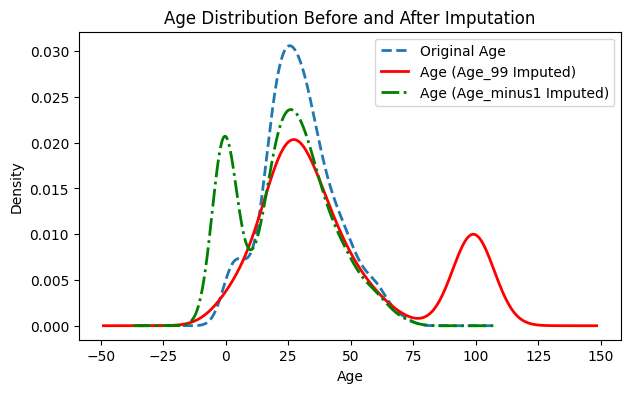

In [24]:
fig, ax = plt.subplots(figsize=(7,4))

# Plot KDE for original variable 
X_train['Age'].plot(kind='kde', ax=ax, label="Original Age", linestyle="--", linewidth=2)

# Plot KDE for variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red', label="Age (Age_99 Imputed)", linestyle="-", linewidth=2)

# Plot KDE for variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green', label="Age (Age_minus1 Imputed)", linestyle="-.", linewidth=2)

# Add labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Density")
ax.set_title("Age Distribution Before and After Imputation")

# Add legend
ax.legend()

# Show plot
plt.show()

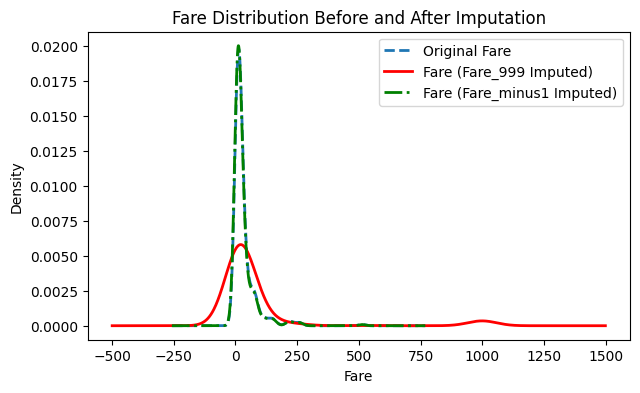

In [25]:
fig, ax = plt.subplots(figsize=(7,4))

# Plot KDE for original variable 
X_train['Fare'].plot(kind='kde', ax=ax, label="Original Fare", linestyle="--", linewidth=2)

# Plot KDE for variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red', label="Fare (Fare_999 Imputed)", linestyle="-", linewidth=2)

# Plot KDE for variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green', label="Fare (Fare_minus1 Imputed)", linestyle="-.", linewidth=2)

# Add labels and title
ax.set_xlabel("Fare")
ax.set_ylabel("Density")
ax.set_title("Fare Distribution Before and After Imputation")

# Add legend
ax.legend()

# Show plot
plt.show()

In [26]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [27]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


## Using Sklearn

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [29]:
imputer1 = SimpleImputer(strategy='constant',fill_value=99)
imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [30]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [31]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [32]:
trf.named_transformers_['imputer1'].statistics_

array([99.])

In [33]:
trf.named_transformers_['imputer2'].statistics_

array([999.])

In [34]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [35]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 99.    , 221.7792,   0.    ],
       [ 99.    ,  25.925 ,   0.    ]])